In [1]:
import os
%pwd
os.chdir("../")
%pwd

'c:\\Users\\EI13136\\Documents\\mlops'

In [2]:
import pandas as pd
df = pd.read_csv("artifacts/data_ingestion/airline_passenger_satisfaction.csv")

In [3]:
# checking the duplicate values

df.duplicated().sum()

0

In [4]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [14]:
#checking missing values columns
missing_columns = [col for col in df if df[col].isnull().sum()!=0] 
missing_columns

['Arrival Delay']

In [15]:
# separating the numeric and categorical columns 

numeric_cols = df.select_dtypes(exclude ='object').columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

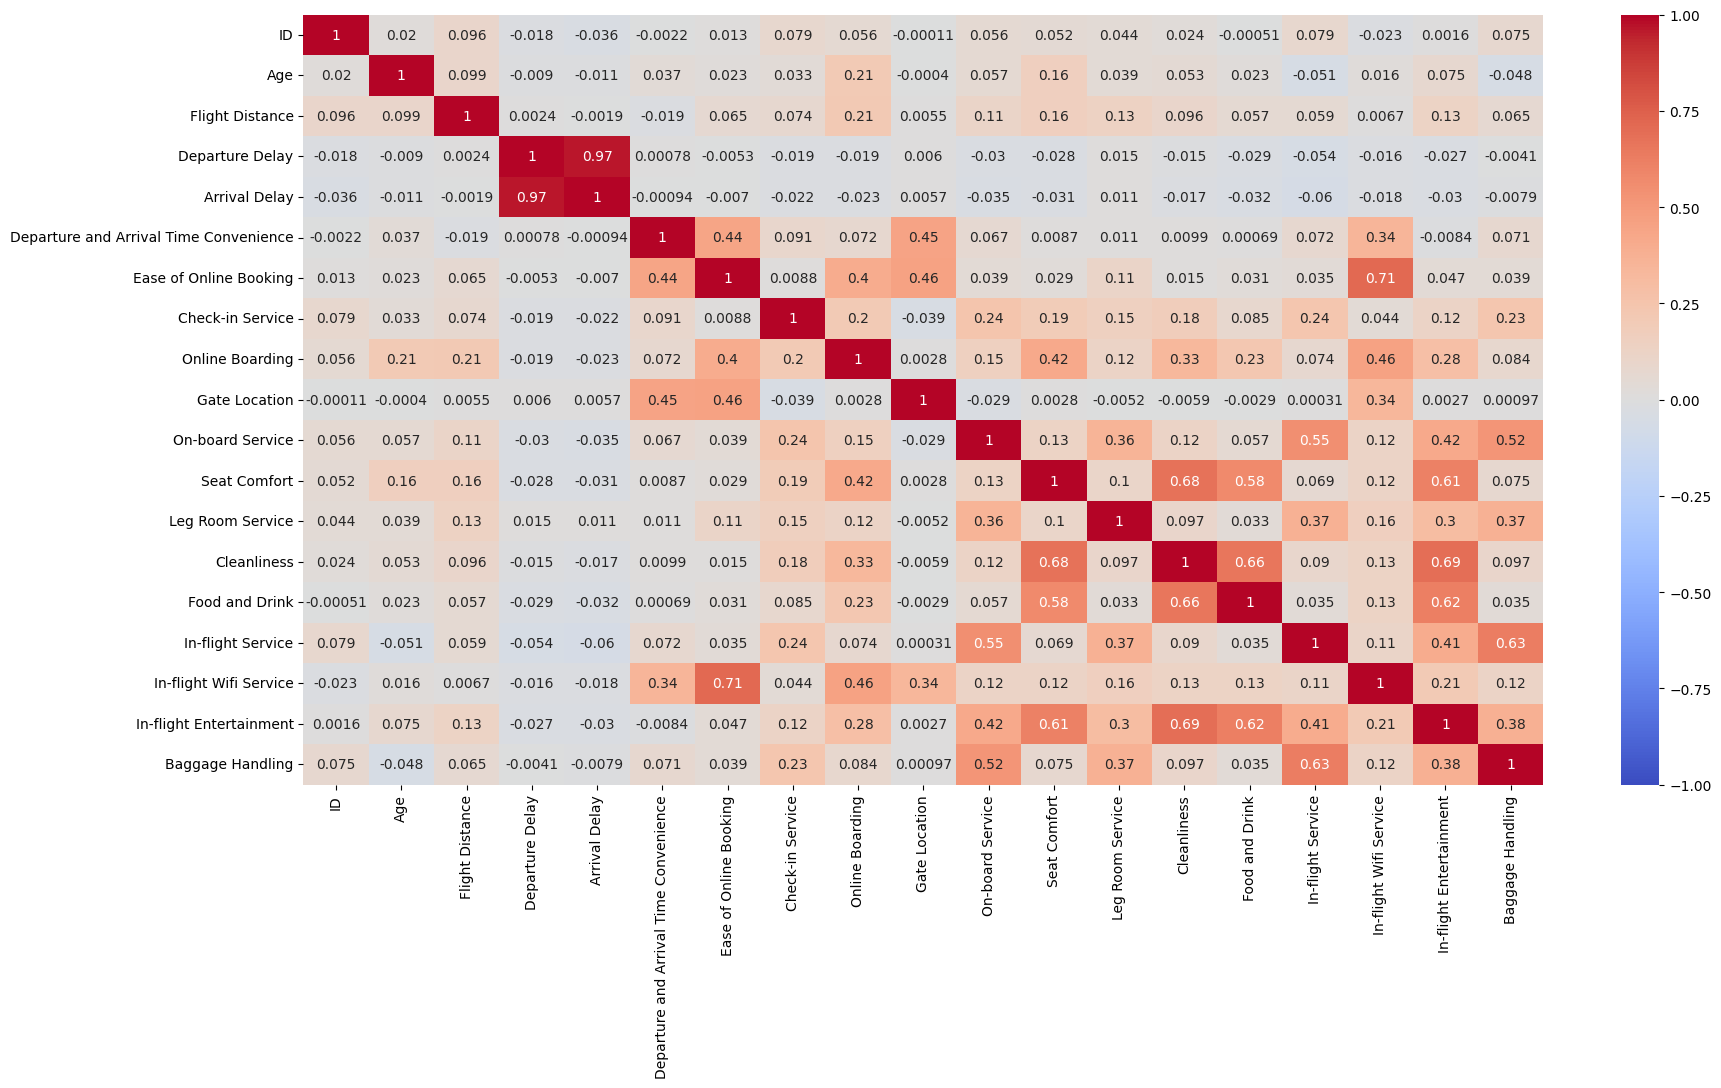

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

# Arival delay and departure delay are highly correlated to eachother by 97%

In [19]:
# Handling missing values of Arrival Delay
from sklearn.impute import SimpleImputer

df[numeric_cols] = SimpleImputer(strategy='median').fit_transform(df[numeric_cols])

In [21]:
#feacture scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [22]:
#df[categorical_cols].head(2)
categorical_cols.remove("Satisfaction")
df[categorical_cols].head()

,Gender,Customer Type,Type of Travel,Class
0,Male,First-time,Business,Business
1,Female,Returning,Business,Business
2,Male,Returning,Business,Business
3,Male,Returning,Business,Business
4,Female,Returning,Business,Business


In [23]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore').fit(df[categorical_cols])
encoded_data = encoder.transform(df[categorical_cols])

encoded_cols = encoder.get_feature_names_out()
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_cols)

df_encoded = pd.concat([df, encoded_df], axis=1)

In [24]:
df_encoded.drop(columns=categorical_cols+['ID'], axis=1, inplace=True)

df_encoded.head(4)

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,0.525641,0.159532,0.001256,0.003157,0.6,0.6,0.8,0.6,0.6,0.6,...,Neutral or Dissatisfied,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.358974,0.159532,0.016332,0.024621,0.4,0.4,0.6,1.0,0.4,1.0,...,Satisfied,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.435897,0.165994,0.000000,0.000000,0.8,0.8,0.8,1.0,0.8,0.6,...,Satisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.551282,0.378433,0.000000,0.000000,0.4,0.4,0.6,0.8,0.4,1.0,...,Satisfied,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [25]:
#mapping output
df['Satisfaction'] = df['Satisfaction'].map({'Neutral or Dissatisfied':0 , 'Satisfied':1})

In [2]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataTransformationConfig:
    root_dir: Path
    data_path: Path
    target_column: str

In [3]:
from airline_passenger_satisfaction.constants import *
from airline_passenger_satisfaction.utils.common import read_yaml, create_directories

In [30]:
class ConfigurationManager:
    def __init__(self,
                 config_filepath = CONFIG_FILE_PATH,
                 params_filepath = PARAMS_FILE_PATH,
                 schema_filepath = SCHEMA_FILE_PATH):
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation
        schema = self.schema.TARGET_COLUMN

        create_directories([config.root_dir])

        data_transformation_config = DataTransformationConfig(
            root_dir= config.root_dir,
            data_path= config.data_path,
            target_column=schema,
        )        

        return data_transformation_config

In [34]:
import os
import sys
import pandas as pd
from ensure import ensure_annotations
from sklearn.exceptions import NotFittedError
from airline_passenger_satisfaction.logger import logger
from airline_passenger_satisfaction.exception import CustomException
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [41]:
class DataTransformation:
    def __init__(self, config: DataTransformationConfig) -> None:
        self.config = config
        self.target_column = config.target_column.name
        self.data = pd.read_csv(self.config.data_path)

    def separate_numeric_categorical_columns(self):
        numeric_columns = self.data.select_dtypes(exclude='object').columns.tolist()
        categorical_columns = self.data.select_dtypes('object').columns.tolist()

        if self.target_column in categorical_columns:
            categorical_columns.remove(self.target_column)
        
        return numeric_columns, categorical_columns
    
    @ensure_annotations
    def handling_missing_data(self, numeric_cols: list):
        missing_columns = [col for col in self.data.columns if self.data[col].isna().sum() != 0]

        if len(missing_columns) != 0:
            for col in missing_columns:
                if col in numeric_cols:
                    self.data[col] = SimpleImputer(strategy='median').fit_transform(self.data[[col]])
                else:
                    self.data[col] = SimpleImputer(strategy='most_frequent').fit_transform(self.data[[col]])

    @ensure_annotations
    def drop_unwanted_columns(self, cols_ls: list, num_cols: list, cat_cols: list):
        columns_to_drop = [col for col in cols_ls if col in self.data.columns]
        
        if columns_to_drop:
            for col in columns_to_drop:
                if col in num_cols:
                    num_cols.remove(col)
                elif col in cat_cols:
                    cat_cols.remove(col)
                    
            self.data.drop(columns=columns_to_drop, inplace=True)

        return num_cols, cat_cols
    
    @ensure_annotations
    def feature_scaling_numerical_columns(self,num_cols: list):
        scaler = StandardScaler()
        self.data[num_cols] = scaler.fit_transform(self.data[num_cols])

    
    @ensure_annotations
    def feature_scaling_categorical_columns(self, cat_cols: list, num_cols: list):
        encoder = OneHotEncoder(handle_unknown='ignore').fit(self.data[cat_cols])
        encoded_data = encoder.transform(self.data[cat_cols])

        encoded_cols = encoder.get_feature_names_out()
        encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_cols)

        self.data = pd.concat([self.data, encoded_df], axis=1)
    
        num_cols, cat_cols = self.drop_unwanted_columns(cols_ls=cat_cols, num_cols=num_cols, cat_cols=cat_cols)
    
        return num_cols, cat_cols



    def mapping_target_column(self):
        if self.target_column in self.data.columns:
            self.data[self.target_column] = self.data[self.target_column].map({'Neutral or Dissatisfied': 0, 'Satisfied': 1})
        else:
            logger.warning(f"Target column '{self.target_column}' not found in the DataFrame.")
    
    def train_test_spliting(self):
        train, test = train_test_split(self.data, test_size=0.25, random_state=42)
        train, valid = train_test_split(self.data, test_size=0.25, random_state=42)

        train.to_csv(os.path.join(self.config.root_dir, "train.csv"), index=False)
        test.to_csv(os.path.join(self.config.root_dir, "test.csv"), index=False)
        valid.to_csv(os.path.join(self.config.root_dir, "valid.csv"), index=False)

        logger.info("Split data into training and test sets")
        logger.info(train.shape)
        logger.info(test.shape)
        logger.info(valid.shape)

        print(train.shape)
        print(test.shape)
        print(valid.shape)


In [43]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()
    data_transformation = DataTransformation(config=data_transformation_config)
    num_cols, cat_cols = data_transformation.separate_numeric_categorical_columns()
    data_transformation.handling_missing_data(numeric_cols=num_cols)
    num_cols, cat_cols = data_transformation.drop_unwanted_columns(['ID'], num_cols, cat_cols)
    data_transformation.feature_scaling_numerical_columns(num_cols=num_cols)
    num_cols,cat_cols = data_transformation.feature_scaling_categorical_columns(cat_cols=cat_cols,num_cols=num_cols)
    data_transformation.mapping_target_column()
    data_transformation.train_test_spliting()
except Exception as e:
    logger.warning(e)
    raise CustomException(e, sys)

[2024-02-08 13:23:30,753] [INFO] [Airline Passenger Reviews Logger] [common] : yaml file config\config.yaml loaded successfully
[2024-02-08 13:23:30,756] [INFO] [Airline Passenger Reviews Logger] [common] : yaml file params.yaml loaded successfully
[2024-02-08 13:23:30,760] [INFO] [Airline Passenger Reviews Logger] [common] : yaml file schema.yaml loaded successfully
[2024-02-08 13:23:30,761] [INFO] [Airline Passenger Reviews Logger] [common] : Created directory at : artifacts
[2024-02-08 13:23:30,762] [INFO] [Airline Passenger Reviews Logger] [common] : Created directory at : artifacts/data_transformation
[2024-02-08 13:23:34,801] [INFO] [Airline Passenger Reviews Logger] [325349419] : Split data into training and test sets
[2024-02-08 13:23:34,801] [INFO] [Airline Passenger Reviews Logger] [325349419] : (97410, 28)
[2024-02-08 13:23:34,801] [INFO] [Airline Passenger Reviews Logger] [325349419] : (32470, 28)
(97410, 28)
(32470, 28)
